# Gensim word vector visualization of various word vectors

In [1]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

plt.rcParams["figure.figsize"] = (30,3)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Для работы с эмбеддингами воспользуемся библотекой gensim.

Загрузим эмбединги языковой модели GLOVE [Glove](https://nlp.stanford.edu/projects/glove/). Они [этого zip файла](https://nlp.stanford.edu/data/glove.6B.zip)

In [ ]:
!wget https://nlp.stanford.edu/data/glove.6B.zip

In [2]:
glove_file = 'glove.6B.100d.txt'
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

/var/folders/hg/wyjbzhnn71d60tgsx5l8yt1c0000gn/T/ipykernel_29742/2042008984.py:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_glove_file)


(400000, 100)

In [3]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [13]:
model.most_similar('eminem')

[('rapper', 0.735619306564331),
 ('jay-z', 0.7335458397865295),
 ('kanye', 0.7171639204025269),
 ('ludacris', 0.6866706013679504),
 ('rap', 0.6838934421539307),
 ('dre', 0.6807680130004883),
 ('snoop', 0.6771699786186218),
 ('rappers', 0.6731076836585999),
 ('t.i.', 0.6723411679267883),
 ('akon', 0.6514133810997009)]

In [8]:
model.most_similar('nissan')

[('toyota', 0.8108117580413818),
 ('honda', 0.8056362867355347),
 ('mazda', 0.7991487383842468),
 ('motors', 0.7604535222053528),
 ('volkswagen', 0.7533993721008301),
 ('automaker', 0.7529304027557373),
 ('mitsubishi', 0.7461801171302795),
 ('daimlerchrysler', 0.7414448857307434),
 ('chrysler', 0.7348416447639465),
 ('isuzu', 0.7293778657913208)]

In [14]:
model.most_similar(positive='banana')

[('coconut', 0.7097253203392029),
 ('mango', 0.7054824233055115),
 ('bananas', 0.6887733936309814),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532308578491),
 ('fruit', 0.6519854664802551),
 ('peanut', 0.6420575976371765),
 ('pecan', 0.6349172592163086),
 ('cashew', 0.6294420957565308),
 ('papaya', 0.6246591210365295)]

In [4]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [44]:
def analogy(pos_1, pos_2, neg_1):
    "pos_1 + pos_2 - neg_1 = neg_2"
    result = model.most_similar(positive=[pos_1, pos_2], negative=[neg_1])
    return result[0][0]

In [31]:
analogy('king', 'woman', 'man')

'queen'

In [45]:
analogy('russia', 'paris', 'moscow')

'france'

In [34]:
analogy('russia', 'moscow', 'paris')

'ukraine'

In [35]:
analogy('paris', 'moscow', 'russia')

'london'

In [43]:
analogy('moscow', 'paris', 'france')

'kiev'

In [26]:
analogy('usa', 'dollar', 'france')

'euro'

![Analogy](word2vec-king-queen-composition.png)

In [7]:
analogy('japan', 'japanese', 'australia')

'australian'

In [21]:
analogy('moscow', 'russia', 'paris')

'france'

In [18]:
analogy('france', 'champagne', 'russia')

'vodka'

In [12]:
analogy('dre', 'eminem', 'lenin')

'stalin'

In [13]:
analogy('tall', 'tallest', 'long')

'longest'

In [14]:
analogy('good', 'fantastic', 'bad')

'terrible'

In [15]:
print(model.doesnt_match("dog cat cola fox".split()))

cola


In [16]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.key_to_index.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(10,10))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

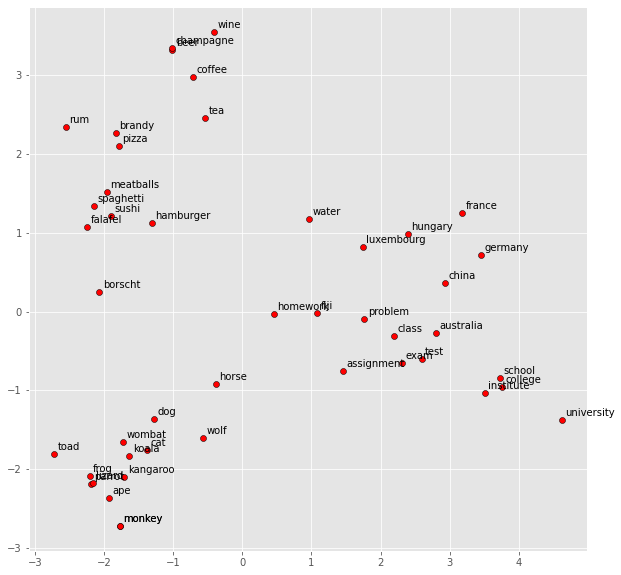

In [17]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

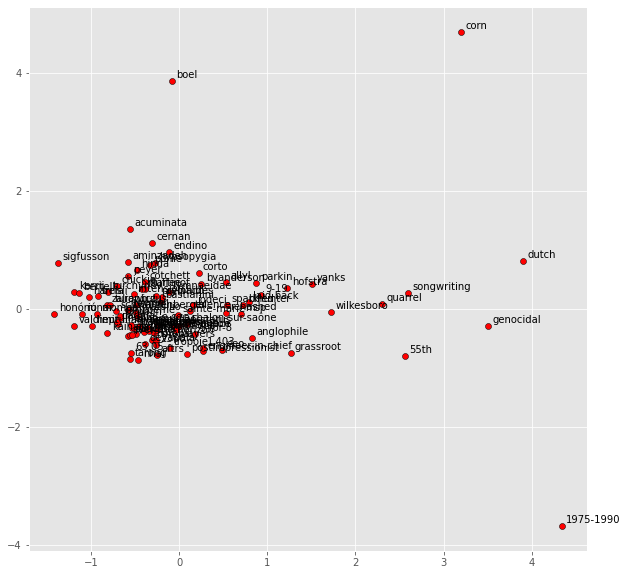

In [18]:
display_pca_scatterplot(model, sample=100)